## Business Problem:

The healthcare domain holds immense significance in the market due to its direct impact on individuals' lives. Consequently, remaining proactive in this area is crucial. Money plays a pivotal role, especially considering the potentially exorbitant costs of treatment. For individuals without insurance coverage, this can lead to challenging financial circumstances. Medical insurance companies, too, aim to minimize risks by optimizing insurance costs, recognizing that maintaining good health ultimately lies in the hands of each individual. Adopting healthy habits, such as a balanced diet and regular exercise, significantly reduces the likelihood of falling ill.

## Goal & Objective: 

The objective of this exercise is to build a model, using data that provide the optimum insurance cost for an individual. You have to use the health and habit related parameters for the estimated cost of insurance

- File: Data.csv (Kaggle)
- Target variable: insurance_cost

## Data dictionary

- applicant_id: Applicant unique ID
- years_of_insurance_with_us: Since how many years customer is taking policy from the same company only
- regular_checkup_lasy_year: Number of times customers has done the regular health check up in last one year
- adventure_sports: Customer is involved with adventure sports like climbing, diving etc.
- Occupation: Occupation of the customer
- visited_doctor_last_1_year: Number of times customer has visited doctor in last one year
- cholesterol_level: Cholesterol level of the customers while applying for insurance
- daily_avg_steps: Average daily steps walked by customers
- age: Age of the customer
- heart_decs_history: Any past heart diseases
- other_major_decs_history: Any past major diseases apart from heart like any operation
- Gender: Gender of the customer
- avg_glucose_level: Average glucose level of the customer while applying the insurance
- bmi: BMI of the customer while applying the insurance
- smoking_status: Smoking status of the customer
- Year_last_admitted: When customer have been admitted in the hospital last time
- Location: Location of the hospital
- weight: Weight of the customer
- covered_by_any_other_company: Customer is covered from any other insurance company
- Alcohol: Alcohol consumption status of the customer
- exercise: Regular exercise status of the customer
- weight_change_in_last_one_year: How much variation has been seen in the weight of the customer in last year
- fat_percentage: Fat percentage of the customer while applying the insurance
- insurance_cost: Total Insurance cost

In [295]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.style
plt.style.use('fivethirtyeight')

In [296]:
# Importing the data
my_data=pd.read_csv('Insurance_Data.csv')

In [297]:
# Reading the head of the data
my_data.head().T

0                1                2  \
applicant_id                          5000             5001             5002   
years_of_insurance_with_us               3                0                1   
regular_checkup_last_year                1                0                0   
adventure_sports                         1                0                0   
Occupation                         Salried          Student         Business   
visited_doctor_last_1_year               2                4                4   
cholesterol_level               125 to 150       150 to 175       200 to 225   
daily_avg_steps                       4866             6411             4509   
age                                     28               50               68   
heart_decs_history                       1                0                0   
other_major_decs_history                 0                0                0   
Gender                                Male             Male           Female   
avg_glucose_level                       97              212              166   
bmi                                   31.2             34.2             40.4   
smoking_status                     Unknown  formerly smoked  formerly smoked   
Year_last_admitted                     NaN              NaN              NaN   
Location                           Chennai           Jaipur           Jaipur   
weight                                  67               58               73   
covered_by_any_other_company             N                N                N   
Alcohol                               Rare             Rare            Daily   
exercise                          Moderate         Moderate          Extreme   
weight_change_in_last_one_year           1                3                0   
fat_percentage                          25               27               32   
insurance_cost                       20978             6170            28382   

                                         3             4  
applicant_id                          5003          5004  
years_of_insurance_with_us               7             3  
regular_checkup_last_year                4             1  
adventure_sports                         0             0  
Occupation                        Business       Student  
visited_doctor_last_1_year               2             2  
cholesterol_level               175 to 200    150 to 175  
daily_avg_steps                       6214          4938  
age                                     51            44  
heart_decs_history                       0             0  
other_major_decs_history                 0             1  
Gender                              Female          Male  
avg_glucose_level                      109           118  
bmi                                   22.9          26.5  
smoking_status                     Unknown  never smoked  
Year_last_admitted                     NaN        2004.0  
Location                           Chennai     Bangalore  
weight                                  71            74  
covered_by_any_other_company             Y             N  
Alcohol                               Rare            No  
exercise                                No       Extreme  
weight_change_in_last_one_year           3             0  
fat_percentage                          37            34  
insurance_cost                       27148         29616

In [298]:
# Reading the tail of the data
my_data.tail()

applicant_id  years_of_insurance_with_us  regular_checkup_last_year  \
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  ...  \
24995        225 to 250             5614   22                   0  ...   
24996        200 to 225             4719   58                   0  ...   
24997        150 to 175             5624   34                   0  ...   
24998        225 to 250            10777   27                   0  ...   
24999        150 to 175             5882   22                   1  ...   

        smoking_status Year_last_admitted     Location  weight  \
24995           smokes             2000.0       Kanpur      79   
24996     never smoked             2009.0       Kanpur      66   
24997          Unknown                NaN  Bhubaneswar      76   
24998          Unknown                NaN        Surat      74   
24999  formerly smoked             2014.0      Chennai      57   

      covered_by_any_other_company  Alcohol  exercise  \
24995                            Y     Rare  Moderate   
24996                            N     Rare  Moderate   
24997                            N     Rare  Moderate   
24998                            N     Rare  Moderate   
24999                            N       No        No   

       weight_change_in_last_one_year fat_percentage insurance_cost  
24995                               4             40          39488  
24996                               2             28          14808  
24997                               1             35          33318  
24998                               0             40          30850  
24999                               4             21           6170  

[5 rows x 24 columns]

In [336]:
# Descriptive Analysis
my_data.describe(include='all').T

count unique           top     freq  \
applicant_id                    25000.0    NaN           NaN      NaN   
years_of_insurance_with_us      25000.0    NaN           NaN      NaN   
regular_checkup_last_year       25000.0    NaN           NaN      NaN   
adventure_sports                25000.0    2.0           0.0  22957.0   
Occupation                        25000      3       Student    10169   
visited_doctor_last_1_year      25000.0    NaN           NaN      NaN   
cholesterol_level                 25000      5    150 to 175     8763   
daily_avg_steps                 25000.0    NaN           NaN      NaN   
age                             25000.0    NaN           NaN      NaN   
heart_decs_history              25000.0    2.0           0.0  23634.0   
other_major_decs_history        25000.0    2.0           0.0  22546.0   
Gender                            25000      2          Male    16422   
avg_glucose_level               25000.0    NaN           NaN      NaN   
bmi                             24010.0    NaN           NaN      NaN   
smoking_status                    25000      4  never smoked     9249   
Year_last_admitted              13119.0    NaN           NaN      NaN   
Location                          25000     15     Bangalore     1742   
weight                          25000.0    NaN           NaN      NaN   
covered_by_any_other_company      25000      2             N    17418   
Alcohol                           25000      3          Rare    13752   
exercise                          25000      3      Moderate    14638   
weight_change_in_last_one_year  25000.0    NaN           NaN      NaN   
fat_percentage                  25000.0    NaN           NaN      NaN   
insurance_cost                  25000.0    NaN           NaN      NaN   

                                       mean           std     min       25%  \
applicant_id                        17499.5   7217.022701  5000.0  11249.75   
years_of_insurance_with_us          4.08904      2.606612     0.0       2.0   
regular_checkup_last_year           0.77368      1.199449     0.0       0.0   
adventure_sports                        NaN           NaN     NaN       NaN   
Occupation                              NaN           NaN     NaN       NaN   
visited_doctor_last_1_year           3.1042      1.141663     0.0       2.0   
cholesterol_level                       NaN           NaN     NaN       NaN   
daily_avg_steps                  5215.88932   1053.179748  2034.0    4543.0   
age                                44.91832     16.107492    16.0      31.0   
heart_decs_history                      NaN           NaN     NaN       NaN   
other_major_decs_history                NaN           NaN     NaN       NaN   
Gender                                  NaN           NaN     NaN       NaN   
avg_glucose_level                    167.53     62.729712    57.0     113.0   
bmi                               31.393328      7.876535    12.3      26.1   
smoking_status                          NaN           NaN     NaN       NaN   
Year_last_admitted              2003.892217      7.581521  1990.0    1997.0   
Location                                NaN           NaN     NaN       NaN   
weight                             71.61048      9.325183    52.0      64.0   
covered_by_any_other_company            NaN           NaN     NaN       NaN   
Alcohol                                 NaN           NaN     NaN       NaN   
exercise                                NaN           NaN     NaN       NaN   
weight_change_in_last_one_year      2.51796      1.690335     0.0       1.0   
fat_percentage                     28.81228      8.632382    11.0      21.0   
insurance_cost                  27147.40768  14323.691832  2468.0   16042.0   

                                    50%       75%      max  
applicant_id                    17499.5  23749.25  29999.0  
years_of_insurance_with_us          4.0       6.0      8.0  
regular_checkup_last_year           0.0       1.0

In [338]:
# Duplicate check
my_data.duplicated().sum()

0

In [300]:
# Info of the data
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_last_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [301]:
# Null_value count
my_data.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_last_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [302]:
# Importing vizualization Library
import matplotlib.pyplot as plt
%matplotlib inline
# Importing seaborn Library
import seaborn as sns

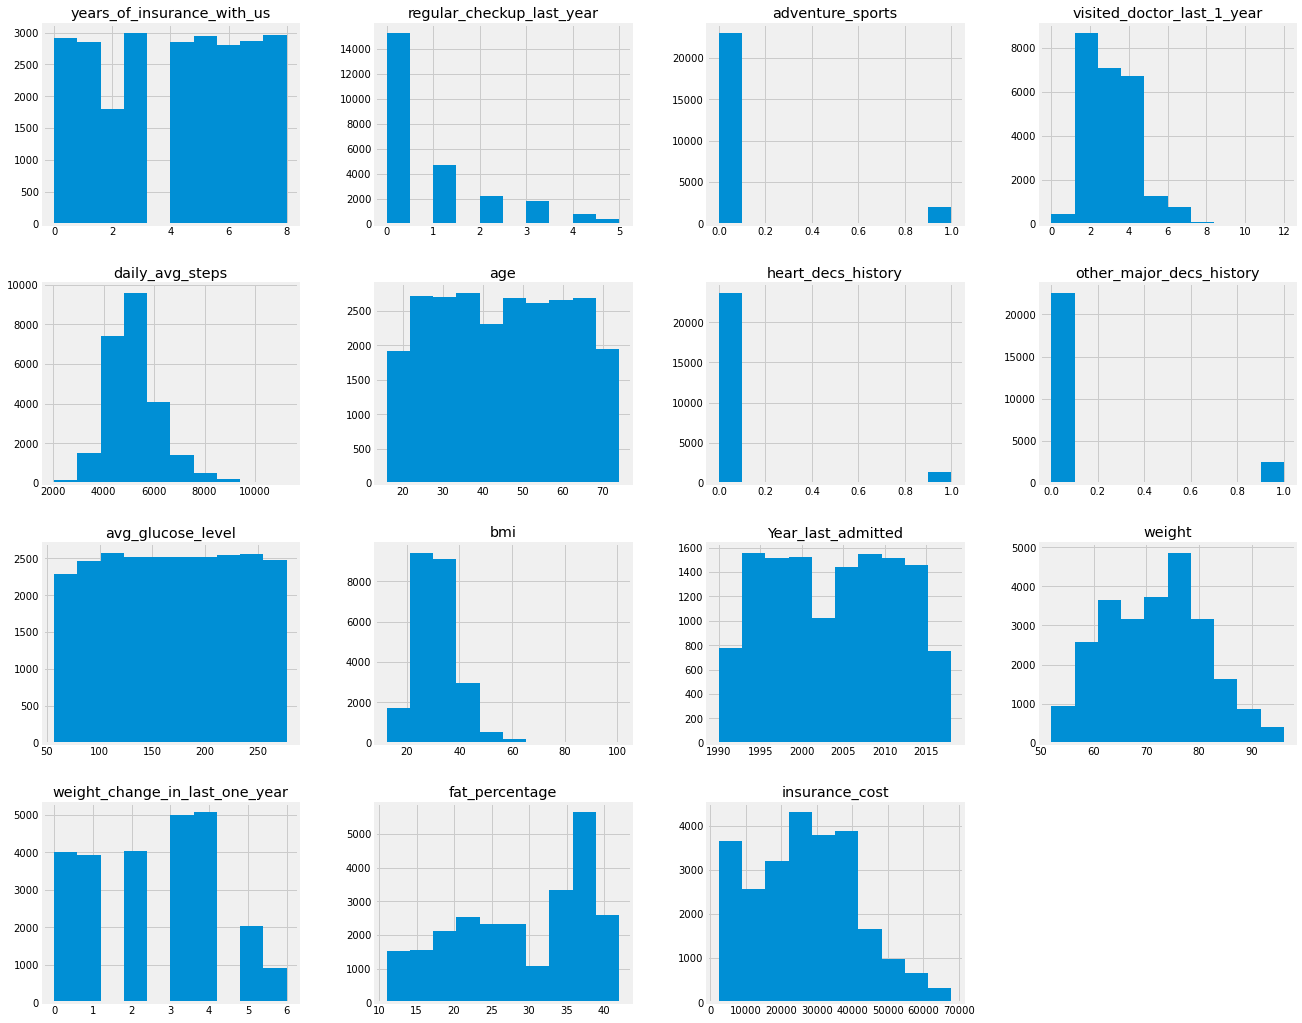

In [303]:
# Frequency distribution - Histrogram plotb
x=my_data.drop({'applicant_id'},axis=1)
x.hist(figsize=(20,18))
plt.show()

In [304]:
#Checking the datatype for specific feature
my_data['adventure_sports']=my_data['adventure_sports'].astype(object)
my_data['heart_decs_history']=my_data['heart_decs_history'].astype(object)
my_data['other_major_decs_history']=my_data['other_major_decs_history'].astype(object)

In [320]:
# Storing catogarical datatype varaibles in new varaible cat
cat = my_data[['Occupation','adventure_sports','heart_decs_history','other_major_decs_history','cholesterol_level','Gender','smoking_status','Location','covered_by_any_other_company','Alcohol','exercise']]

# Storing int & float datatype varaibles in new varaible num
num = my_data[['years_of_insurance_with_us','regular_checkup_last_year','visited_doctor_last_1_year','daily_avg_steps','age','avg_glucose_level','bmi','Year_last_admitted','weight','weight_change_in_last_one_year','fat_percentage','insurance_cost']]


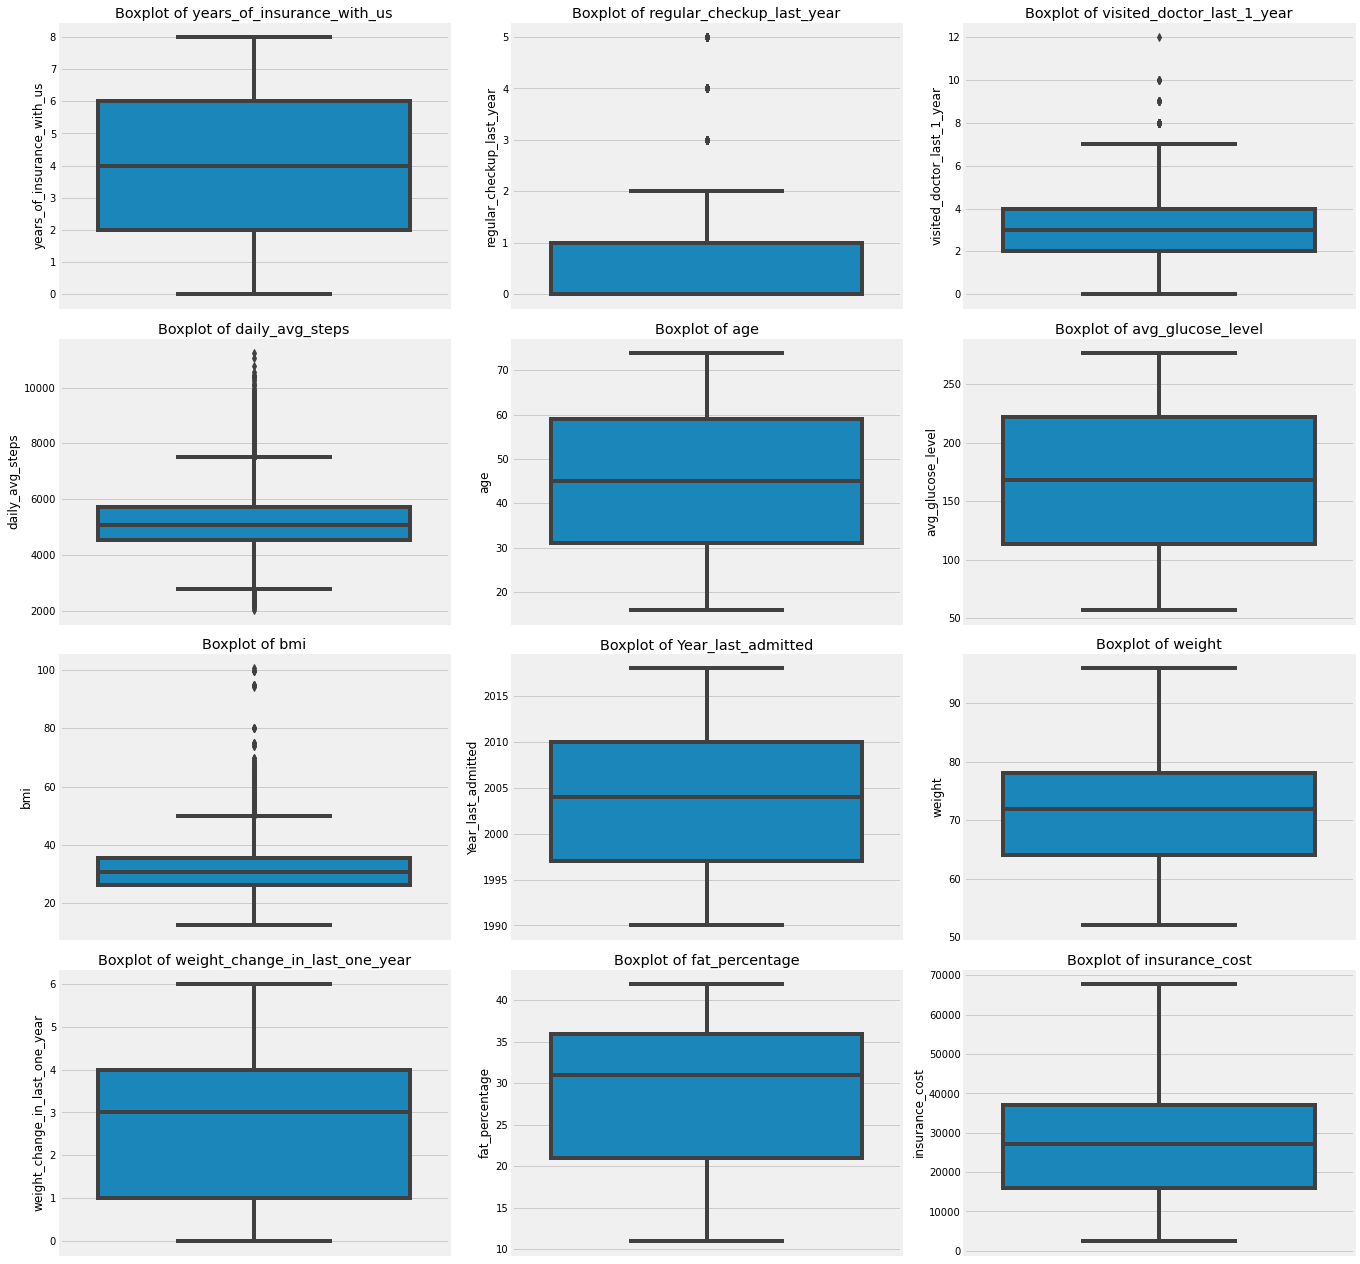

In [321]:
# Checking the outliers of the data
plt.figure(figsize=(19,22))
feature_list=num.columns
for i in range(len(feature_list)): #(0,14)
    plt.subplot(5,3,i+1)
    sns.boxplot(y=num[feature_list[i]],data=num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [308]:
# Storing the data for count plot vizualization
df_cat = my_data[['Occupation','adventure_sports','heart_decs_history','other_major_decs_history','cholesterol_level','Gender','smoking_status','Location','covered_by_any_other_company','Alcohol']].columns


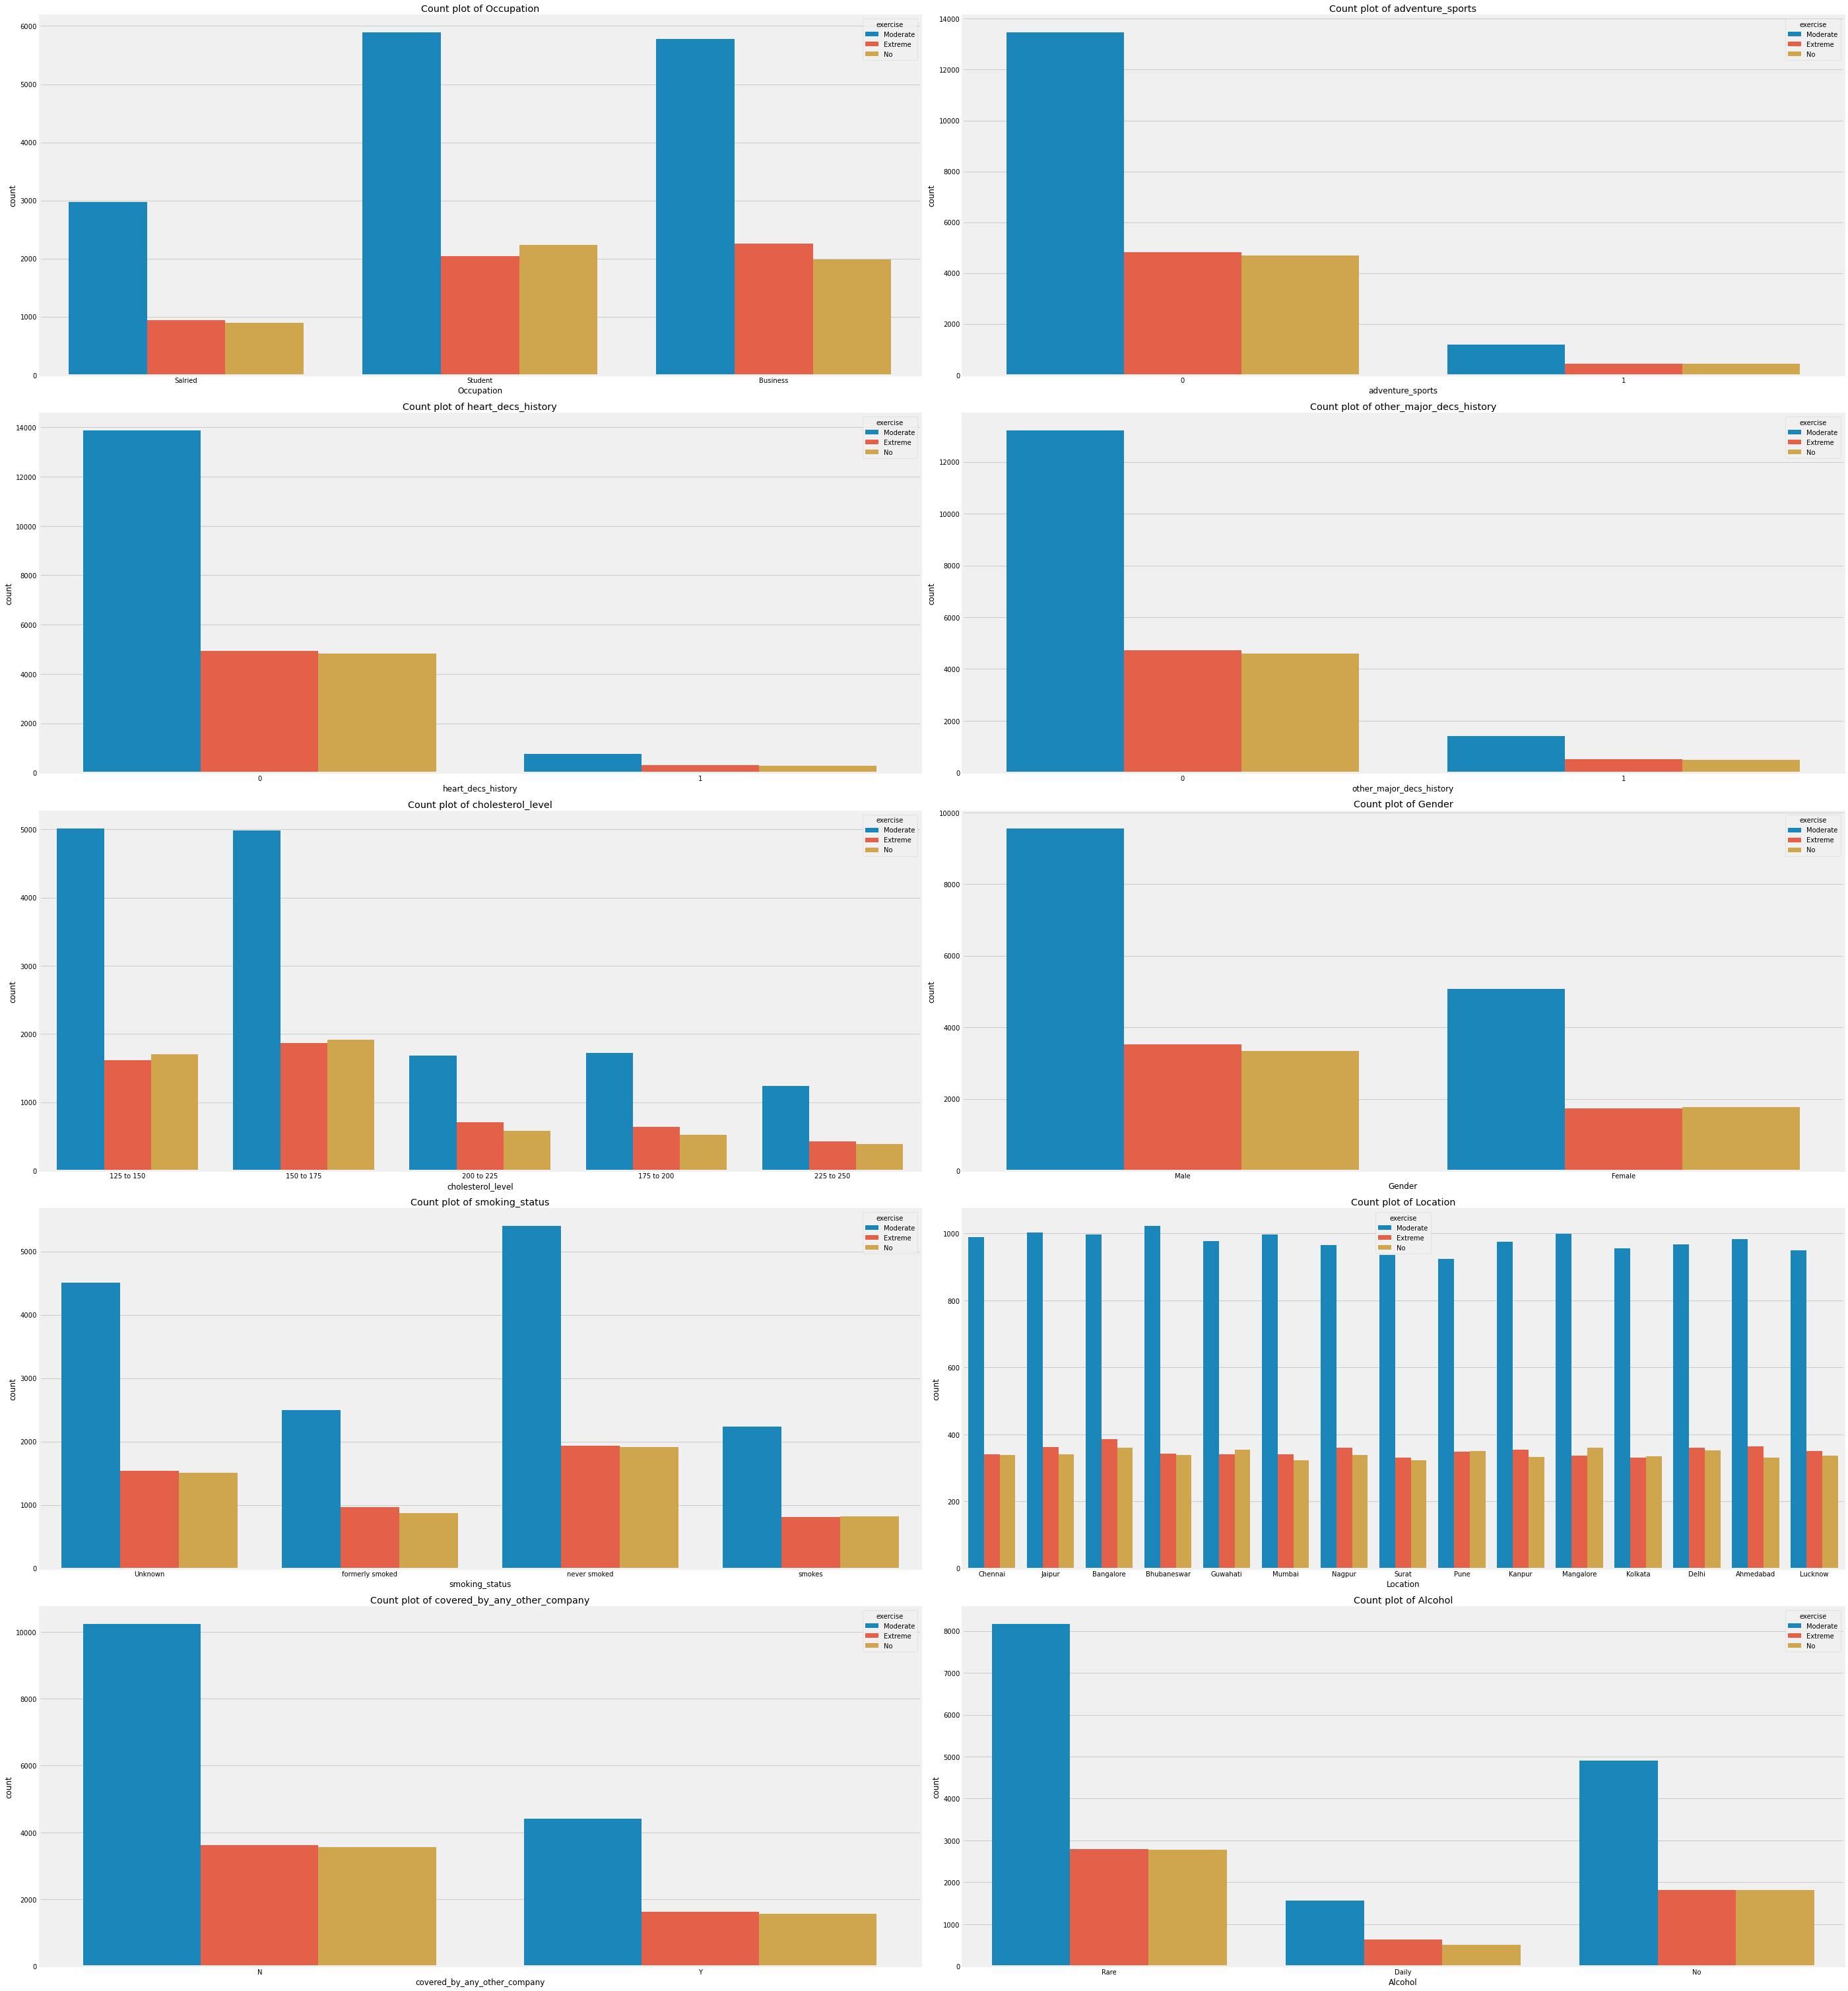

In [310]:
plt.figure(figsize=(39,42))
for i in range(len(df_cat)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df_cat[i],hue=my_data['exercise'],data=my_data)
    plt.title('Count plot of {}'.format(df_cat[i]))
    plt.tight_layout()

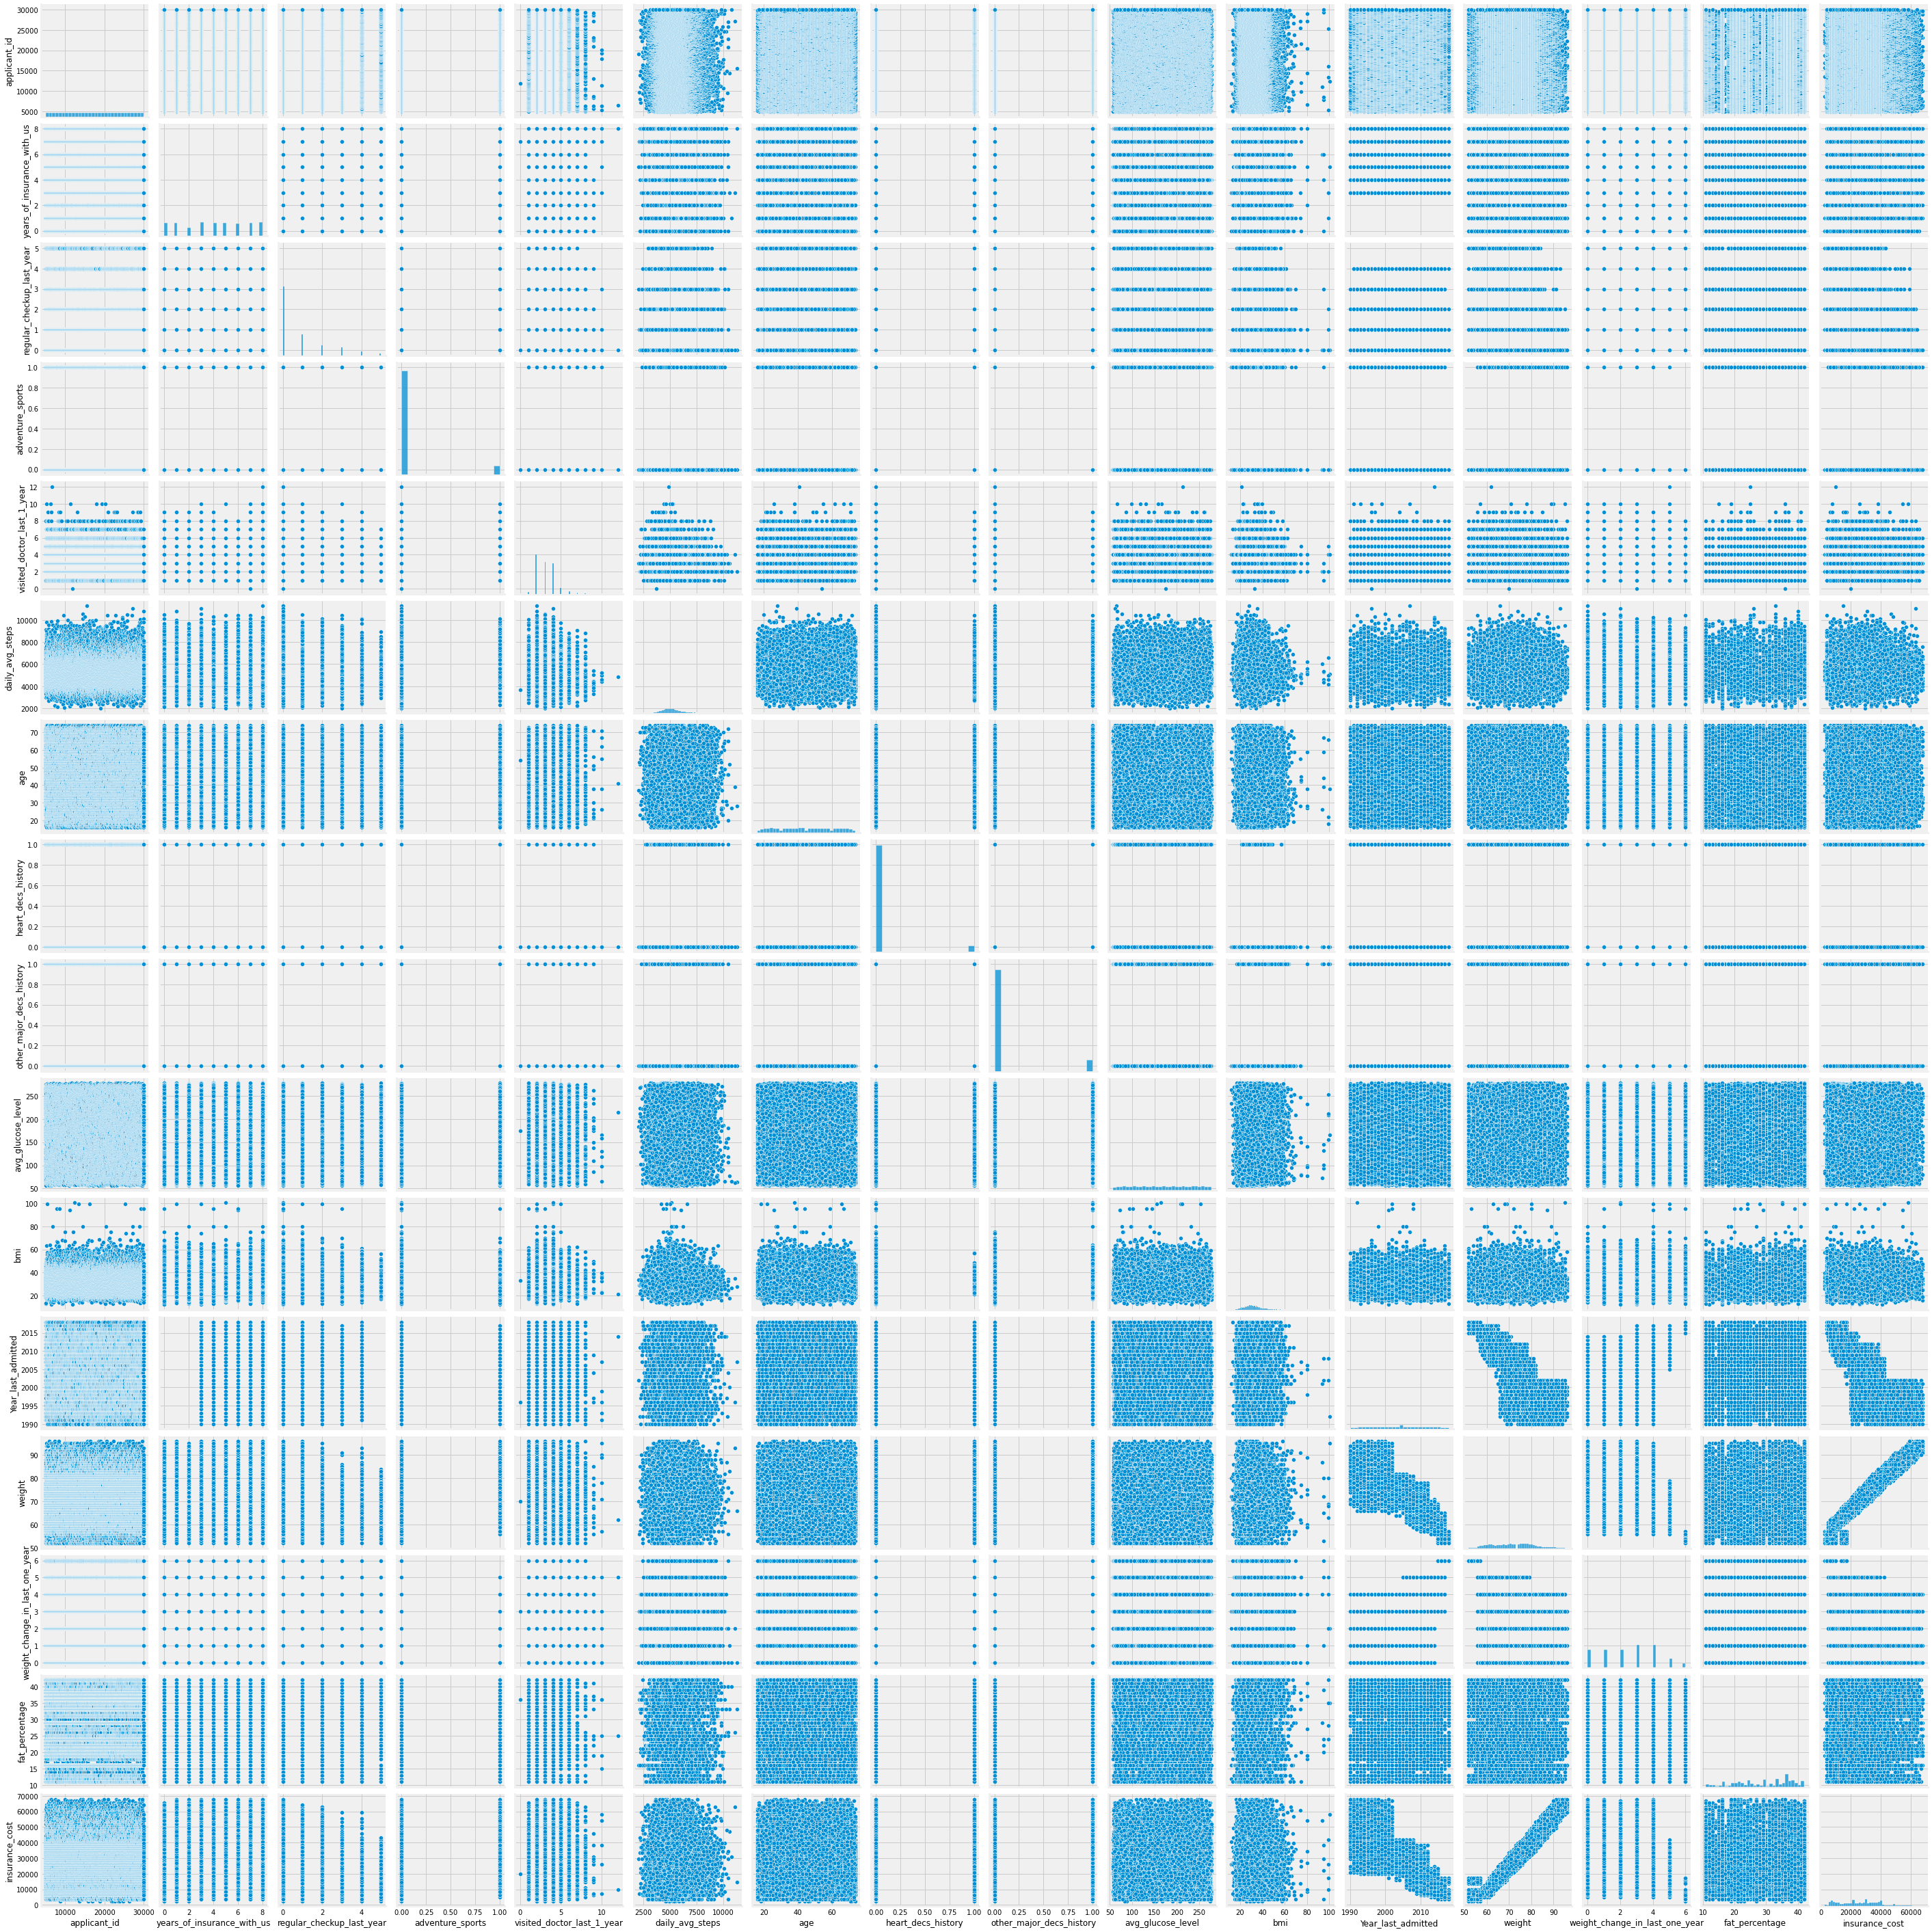

In [311]:
#Pair plot
sns.pairplot(my_data)
plt.show()

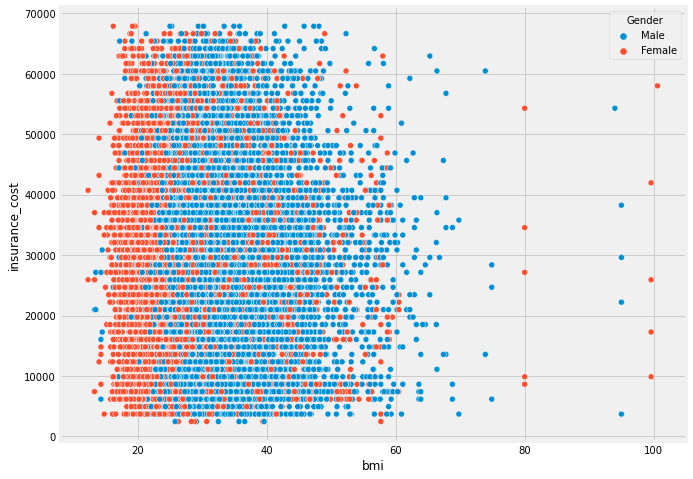

In [329]:
#Scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(my_data.bmi,my_data.insurance_cost, hue=my_data.Gender)
plt.show()

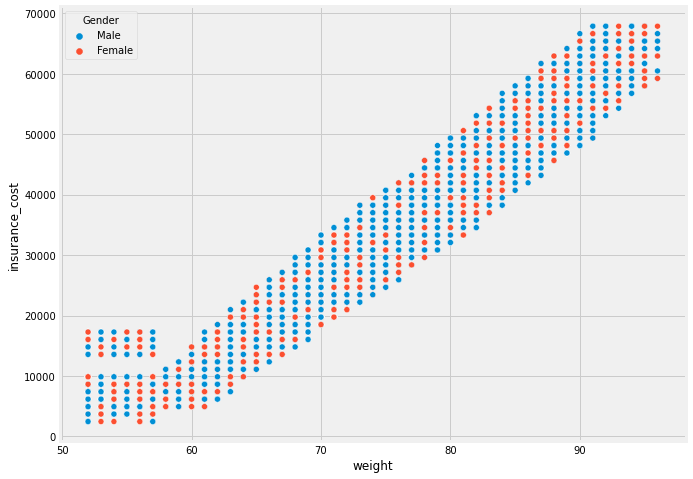

In [328]:
#Scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(my_data.weight,my_data.insurance_cost, hue=my_data.Gender)
plt.show()

<AxesSubplot:>

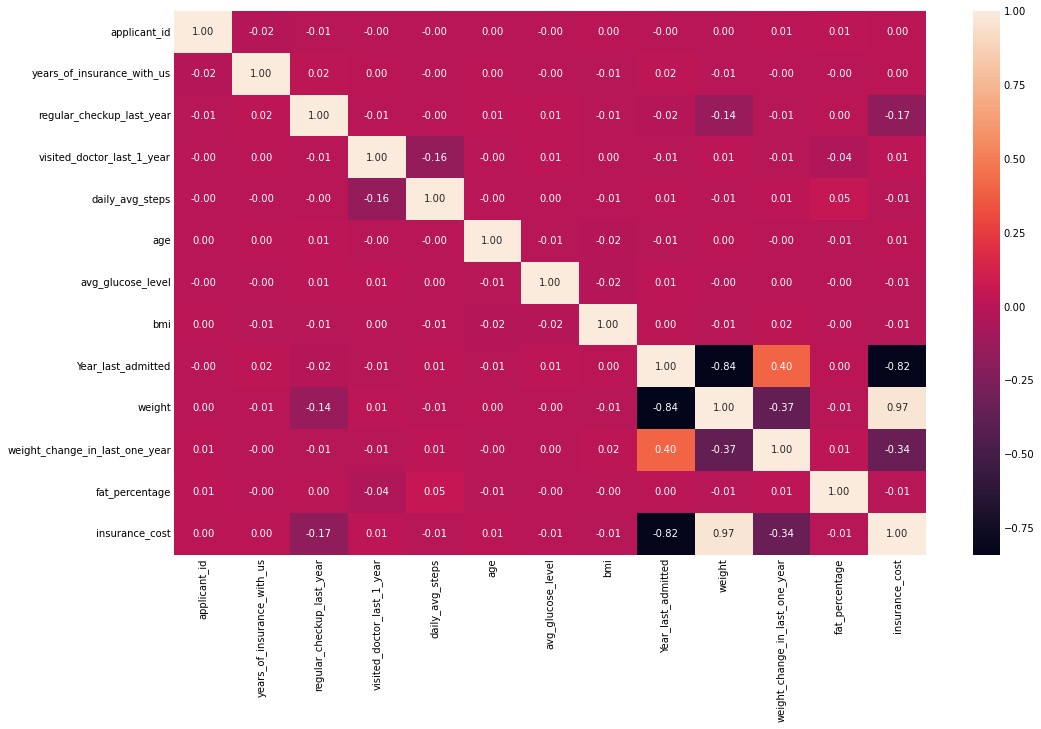

In [335]:
# Correlation
corr=my_data.corr(method='pearson')

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, fmt='.2f')